<a href="https://colab.research.google.com/github/AashiDutt/AI-and-ML-for-Coders/blob/main/Chapter_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Colaboratory contains code for:

1. Predicting next word

2. Predicting next 10 words

3. Irish Dataset

4. Shakespeare Dataset  - Character based Encoding

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [ ]:
tokenizer = Tokenizer()

data = "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1

In [ ]:
#splitting sentence into multipe smaller sequences
# eg - [4 2 66 8] split - [4 2] [4 2 66] [4 2 66 8]

input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

print(input_sequences[:5])


[[4, 2], [4, 2, 66], [4, 2, 66, 8], [4, 2, 66, 8, 67], [4, 2, 66, 8, 67, 68]]


In [ ]:
#pad input sequences - prepad
# eg [4,2,66,8] - [0 0 4 2] [0 4 2 66] [4 2 66 8]
# to find the longest sentence in input sequence and pad everything to its length

max_sequence_len = max([len(x) for x in input_sequences])

input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre'))

print(input_sequences[:5])

[[ 0  0  0  0  0  0  0  0  0  4  2]
 [ 0  0  0  0  0  0  0  0  4  2 66]
 [ 0  0  0  0  0  0  0  4  2 66  8]
 [ 0  0  0  0  0  0  4  2 66  8 67]
 [ 0  0  0  0  0  4  2 66  8 67 68]]


[ 0  0  0  0  0  0  0  0  0  4  2]

Input(X) = 0  0  0  0  0  0  0  0  0  4 

Label(Y) = 2

In [ ]:
# match each feature to its corresponding label

xs, labels = input_sequences[:,:-1], input_sequences[:,-1]

# xs --- input_sequences[:,:-1] all rows, all columns except last column


In [ ]:
#encode labels
ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 8)) #embedding dim = 8
model.add(Bidirectional(LSTM(max_sequence_len -1))) #last one used for label
model.add(Dense(total_words,activation = 'softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
history = model.fit(xs, ys, epochs = 1500, verbose = 1)

Epoch 1/1500
15/15 [==============================] - 4s 10ms/step - loss: 5.5709 - accuracy: 0.0265
Epoch 2/1500
15/15 [==============================] - 0s 10ms/step - loss: 5.5623 - accuracy: 0.0530
Epoch 3/1500
15/15 [==============================] - 0s 10ms/step - loss: 5.5517 - accuracy: 0.0508
Epoch 4/1500
15/15 [==============================] - 0s 10ms/step - loss: 5.5312 - accuracy: 0.0486
Epoch 5/1500
15/15 [==============================] - 0s 10ms/step - loss: 5.4789 - accuracy: 0.0486
Epoch 6/1500
15/15 [==============================] - 0s 10ms/step - loss: 5.3545 - accuracy: 0.0486
Epoch 7/1500
15/15 [==============================] - 0s 11ms/step - loss: 5.1896 - accuracy: 0.0486
Epoch 8/1500
15/15 [==============================] - 0s 10ms/step - loss: 5.0980 - accuracy: 0.0486
Epoch 9/1500
15/15 [==============================] - 0s 10ms/step - loss: 5.0740 - accuracy: 0.0419
Epoch 10/1500
15/15 [==============================] - 0s 10ms/step - loss: 5.0537 - accura

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

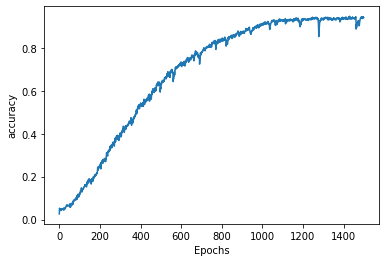

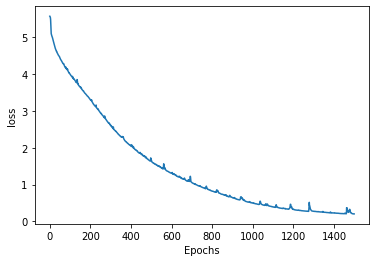

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
#predicting next word

seed_text = "sweet jeremy saw dublin to" #"in the town of athy"

#tokenize seed_text

token_list = tokenizer.texts_to_sequences([seed_text])[0]

#pad it

token_list = pad_sequences([token_list],maxlen = max_sequence_len -1, padding = 'pre')


In [ ]:
#predict
#returns probabilities for each word
#argmax returns the one with max probability

predicted = np.argmax(model.predict(token_list), axis = -1)
print(predicted)

[3]


In [ ]:
# look for word in word index

for word, index in tokenizer.word_index.items():
  if index == predicted:
    print(word)
    break

a


Orignal text - In the town of Athy one Jeremy Lanigan



In [ ]:
# Combining seed text and prediction to get next 10 words

seed_text = "sweet jeremy saw dublin to "
next_words = 10

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list],maxlen = max_sequence_len -1, padding = 'pre')
  predicted = np.argmax(model.predict(token_list, verbose = 0), axis = -1)
  output_word = ""

  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
  print(seed_text)
  print('\n')

sweet jeremy saw dublin to  a


sweet jeremy saw dublin to  a taras


sweet jeremy saw dublin to  a taras old


sweet jeremy saw dublin to  a taras old died


sweet jeremy saw dublin to  a taras old died nonsense


sweet jeremy saw dublin to  a taras old died nonsense cask


sweet jeremy saw dublin to  a taras old died nonsense cask glisten


sweet jeremy saw dublin to  a taras old died nonsense cask glisten up


sweet jeremy saw dublin to  a taras old died nonsense cask glisten up relations


sweet jeremy saw dublin to  a taras old died nonsense cask glisten up relations relations




Irish Song Dataset

In [ ]:
# Extending Dataset

#Downloading data
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

data = open('/tmp/irish-lyrics-eof.txt').read()
corpus = data.lower().split("\n")


--2022-02-15 06:55:14--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.74.128, 209.85.146.128, 142.250.136.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.74.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2022-02-15 06:55:14 (114 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [ ]:
tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1

In [ ]:
#splitting sentence into multipe smaller sequences

input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

print(input_sequences[:5])


[[51, 11], [51, 11, 101], [51, 11, 101, 1312], [51, 11, 101, 1312, 48], [51, 11, 101, 1312, 48, 2]]


In [ ]:
#pad input sequences - prepad
# to find the longest sentence in input sequence and pad everything to its length

max_sequence_len = max([len(x) for x in input_sequences])

input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre'))

print(input_sequences[:5])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    51   11]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0   51
    11  101]
 [   0    0    0    0    0    0    0    0    0    0    0    0   51   11
   101 1312]
 [   0    0    0    0    0    0    0    0    0    0    0   51   11  101
  1312   48]
 [   0    0    0    0    0    0    0    0    0    0   51   11  101 1312
    48    2]]


In [ ]:
# match each feature to its corresponding label

xs, labels = input_sequences[:,:-1], input_sequences[:,-1]

# xs --- input_sequences[:,:-1] all rows, all columns except last column

In [ ]:
#encode labels
ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 8)) #embedding dim = 8
model.add(Bidirectional(LSTM(max_sequence_len-1))) #last one used for label
#model.add(Bidirectional(LSTM(max_sequence_len-1)))
model.add(Dense(total_words,activation = 'softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
history = model.fit(xs, ys, epochs = 1000, verbose = 1)

Epoch 1/1000
377/377 [==============================] - 60s 13ms/step - loss: 6.8739 - accuracy: 0.0632
Epoch 2/1000
377/377 [==============================] - 5s 13ms/step - loss: 6.4083 - accuracy: 0.0657
Epoch 3/1000
377/377 [==============================] - 5s 13ms/step - loss: 6.3049 - accuracy: 0.0657
Epoch 4/1000
377/377 [==============================] - 5s 13ms/step - loss: 6.2195 - accuracy: 0.0656
Epoch 5/1000
377/377 [==============================] - 5s 13ms/step - loss: 6.1442 - accuracy: 0.0696
Epoch 6/1000
377/377 [==============================] - 5s 13ms/step - loss: 6.0735 - accuracy: 0.0743
Epoch 7/1000
377/377 [==============================] - 5s 13ms/step - loss: 6.0059 - accuracy: 0.0792
Epoch 8/1000
377/377 [==============================] - 5s 15ms/step - loss: 5.9445 - accuracy: 0.0802
Epoch 9/1000
377/377 [==============================] - 5s 13ms/step - loss: 5.8840 - accuracy: 0.0827
Epoch 10/1000
377/377 [==============================] - 5s 13ms/step - 

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

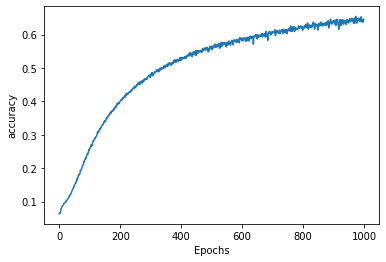

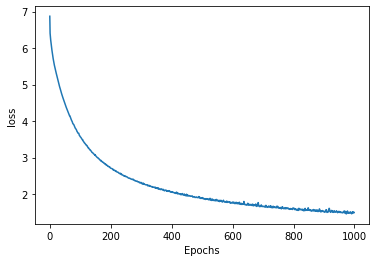

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
#predicting next word

seed_text = "in the town of athy"

#tokenize seed_text

token_list = tokenizer.texts_to_sequences([seed_text])[0]

#pad it

token_list = pad_sequences([token_list],maxlen = max_sequence_len -1, padding = 'pre')


In [ ]:
#predict
#returns probabilities for each word
#argmax returns the one with max probability

predicted = np.argmax(model.predict(token_list), axis = -1)
print(predicted)

[193]


In [ ]:
# look for word in word index

for word, index in tokenizer.word_index.items():
  if index == predicted:
    print(word)
    break

hair


In [ ]:
# Combining seed text and prediction to get next 10 words

seed_text = "sweet jeremy saw dublin to "
next_words = 10

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list],maxlen = max_sequence_len -1, padding = 'pre')
  predicted = np.argmax(model.predict(token_list, verbose = 0), axis = -1)
  output_word = ""

  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
  print(seed_text)
  print('\n')

sweet jeremy saw dublin to  lost


sweet jeremy saw dublin to  lost raking


sweet jeremy saw dublin to  lost raking was


sweet jeremy saw dublin to  lost raking was you


sweet jeremy saw dublin to  lost raking was you thinking


sweet jeremy saw dublin to  lost raking was you thinking of


sweet jeremy saw dublin to  lost raking was you thinking of the


sweet jeremy saw dublin to  lost raking was you thinking of the rocky


sweet jeremy saw dublin to  lost raking was you thinking of the rocky colleen


sweet jeremy saw dublin to  lost raking was you thinking of the rocky colleen day




Improving the data or extending the data using Windowing technique



In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [7]:
#Downloading data
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

window_size = 32
sentences = []
alltext = []
max_sequence_len = 6
data = open('/tmp/irish-lyrics-eof.txt').read()
corpus = data.lower()
words = corpus.split(" ")
range_size = len(words) - max_sequence_len
for i in range(0, range_size):
  thissentence = ""
  for word in range(0, max_sequence_len-1):
    word = words[i+word]
    thissentence = thissentence + word
    thissentence = thissentence + " "
  sentences.append(thissentence)






--2022-02-17 06:35:53--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.6.128, 142.251.120.128, 74.125.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.6.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2022-02-17 06:35:53 (99.6 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [8]:
oov_tok = "<OOV>"
vocab_size=2700
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok, split=" ", char_level=False)
tokenizer.fit_on_texts(alltext)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

input_sequences = []
for line in sentences:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
#max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

{'<OOV>': 1}
2


In [9]:
print(xs.shape)

(56643, 5)


In [10]:
print(xs[:20])

[[0 0 0 0 1]
 [0 0 0 1 1]
 [0 0 1 1 1]
 [0 1 1 1 1]
 [0 0 0 0 1]
 [0 0 0 1 1]
 [0 0 1 1 1]
 [0 1 1 1 1]
 [0 0 0 0 1]
 [0 0 0 1 1]
 [0 0 1 1 1]
 [0 1 1 1 1]
 [1 1 1 1 1]
 [0 0 0 0 1]
 [0 0 0 1 1]
 [0 0 1 1 1]
 [0 1 1 1 1]
 [1 1 1 1 1]
 [0 0 0 0 1]
 [0 0 0 1 1]]


In [15]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy') > 0.99):
      print("\n Reached 99% accuracy so cancelling training")
      self.model.stop_training = True


In [16]:
callbacks = myCallback()
model = Sequential()
model.add(Embedding(total_words, 16, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=100, verbose=1, callbacks = [callbacks])


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1771/1771 [==============================] - ETA: 0s - loss: 0.0528 - accuracy: 0.9995
 Reached 99% accuracy so cancelling training
1771/1771 [==============================] - 32s 14ms/step - loss: 0.0528 - accuracy: 0.9995


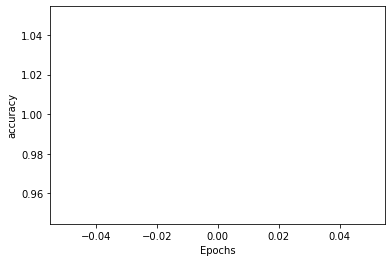

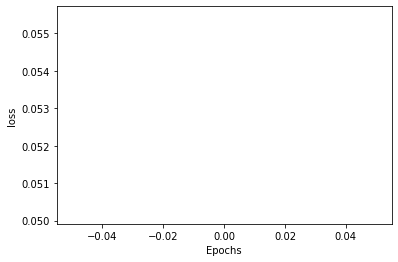

In [17]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [17]:
# Combining seed text and prediction to get next 10 words

seed_text = "sweet jeremy saw dublin to "
next_words = 10

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list],maxlen = max_sequence_len -1, padding = 'pre')
  predicted = np.argmax(model.predict(token_list, verbose = 0), axis = -1)
  output_word = ""

  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
  print(seed_text)
  print('\n')

sweet jeremy saw dublin to  <OOV>


sweet jeremy saw dublin to  <OOV> <OOV>


sweet jeremy saw dublin to  <OOV> <OOV> <OOV>


sweet jeremy saw dublin to  <OOV> <OOV> <OOV> <OOV>


sweet jeremy saw dublin to  <OOV> <OOV> <OOV> <OOV> <OOV>


sweet jeremy saw dublin to  <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>


sweet jeremy saw dublin to  <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>


sweet jeremy saw dublin to  <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>


sweet jeremy saw dublin to  <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>


sweet jeremy saw dublin to  <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>




Shakespeare dataset -- Character Based Encoding


In [18]:
tokenizer = Tokenizer()

data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [19]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [20]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [21]:
print(xs[6])

[ 0  0  0  4  2 66  8 67 68 69]


In [22]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  4  2 66  8 67 68]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [24]:
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [25]:
  model = Sequential()
  model.add(Embedding(total_words, 8))
  model.add(Bidirectional(LSTM(max_sequence_len-1)))
  model.add(Dense(total_words, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(xs, ys, epochs=1500, verbose=1)

Epoch 1/1500
15/15 [==============================] - 4s 11ms/step - loss: 5.5701 - accuracy: 0.0177
Epoch 2/1500
15/15 [==============================] - 0s 11ms/step - loss: 5.5597 - accuracy: 0.0486
Epoch 3/1500
15/15 [==============================] - 0s 11ms/step - loss: 5.5455 - accuracy: 0.0574
Epoch 4/1500
15/15 [==============================] - 0s 11ms/step - loss: 5.5143 - accuracy: 0.0640
Epoch 5/1500
15/15 [==============================] - 0s 10ms/step - loss: 5.4438 - accuracy: 0.0596
Epoch 6/1500
15/15 [==============================] - 0s 10ms/step - loss: 5.3041 - accuracy: 0.0508
Epoch 7/1500
15/15 [==============================] - 0s 11ms/step - loss: 5.1609 - accuracy: 0.0618
Epoch 8/1500
15/15 [==============================] - 0s 10ms/step - loss: 5.0919 - accuracy: 0.0508
Epoch 9/1500
15/15 [==============================] - 0s 11ms/step - loss: 5.0622 - accuracy: 0.0508
Epoch 10/1500
15/15 [==============================] - 0s 10ms/step - loss: 5.0458 - accura

In [26]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

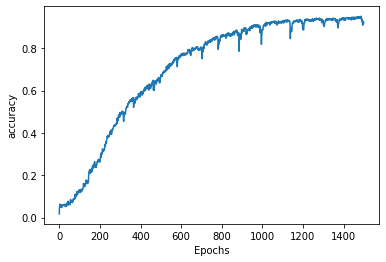

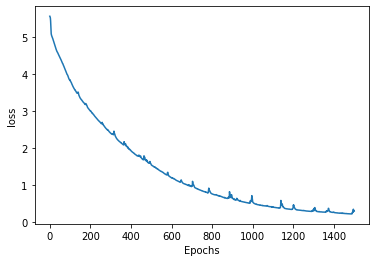

In [27]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [32]:
seed_text = "in the town of athy"

token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
#print(model.predict(token_list))  
predicted = np.argmax(model.predict(token_list))
pred_classes=np.argmax(model.predict(token_list))

for word, index in tokenizer.word_index.items():
	if index == predicted:
		print(word)
		break

one


In [34]:
seed_text = "sweet jeremy saw dublin"
next_words=10
token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list, verbose=0))
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

print(seed_text)

sweet jeremy saw dublin as to to a me three wall wall mccarthy bacon
